# Custom Dataset


In [ ]:
questions=[]
answers=[]

In [ ]:
data=open("/content/drive/MyDrive/Seq2SeqChatbot/seq2seq chatbot.txt","r").read().lower()
for i in data.split("\n\n"):
    a=i.split("\n")
    question=a[0]
    answer=a[1]
    questions.append(question)
    answers.append(answer)

In [ ]:
answers

['i am fine.',
 'i am ten years old and made by gaurav.',
 'i am happy.',
 'i am ten years old and made by gaurav.',
 'i am the personal assistant for kerala start up mission.',
 'i am rishil.',
 'yes.',
 'i would like to help others.',
 'i am a chat bot.',
 'i was made by a great human. his name is gaurav shipurkar.',
 'i was made to give information about the processes taking place inside kerala startup mission.',
 'we give support for startups.',
 'like incubation, technical support, funding etc..',
 '2006. formerly known as technology business incubator.',
 'saji gopinath is the current ceo of kerala startup mission.',
 'thejaswini, technopark, thiruvananthapuram',
 'it is a nodal agency of government of kerala for entrepreneurship development and incubation activities in kerala.',
 'the primary objectives of ksum was to undertake the planning, establishment, and management of technology business incubators/ accelerators in kerala so as to promote technology based entrepreneurship 

In [ ]:
import re
def clean_text(txt):
  
  txt = txt.lower()
  txt = re.sub(r"i'm", "i am", txt)
  txt = re.sub(r"he's", "he is", txt)
  txt = re.sub(r"she's", "she is", txt)
  txt = re.sub(r"that's", "that is", txt)
  txt = re.sub(r"what's", "what is", txt)
  txt = re.sub(r"where's", "where is", txt)
  txt = re.sub(r"\'ll", " will", txt)
  txt = re.sub(r"\'ve", " have", txt)
  txt = re.sub(r"\'re", " are", txt)
  txt = re.sub(r"\'d", " would", txt)
  txt = re.sub(r"won't", "will not", txt)
  txt = re.sub(r"can't", "can not", txt)
  txt = re.sub(r"[^\w\s]", "", txt)
  return txt

In [ ]:
ques=[]
ans=[]
for line in questions:
    ques.append(clean_text(line))
        
for line in answers:
    ans.append(clean_text(line))

In [ ]:
# m=0
# for line in ques:
#   if len(line)>m:
#     m=len(line)
#     print(line)
# print(m)

In [ ]:
sorted_questions = []
sorted_answers = []
for i in range(len(ques)):
  if len(questions[i])<40:
    sorted_questions.append(questions[i])
    sorted_answers.append(answers[i])

In [ ]:
for i in range(0,len(sorted_questions)):
  print(f"Question: {sorted_questions[i]}, Answer: {sorted_answers[i]}")
  print()

Question: how are you., Answer: i am fine.

Question: how old are you., Answer: i am ten years old and made by gaurav.

Question: how are you., Answer: i am happy.

Question: what is your age., Answer: i am ten years old and made by gaurav.

Question: who are you., Answer: i am the personal assistant for kerala start up mission.

Question: what is your name., Answer: i am rishil.

Question: are you happy today., Answer: yes.

Question: what is your hobby., Answer: i would like to help others.

Question: what are you., Answer: i am a chat bot.

Question: who made you., Answer: i was made by a great human. his name is gaurav shipurkar.

Question: what is your purpose., Answer: i was made to give information about the processes taking place inside kerala startup mission.

Question: what are they., Answer: we give support for startups.

Question: what kind of support., Answer: like incubation, technical support, funding etc..

Question: what is kerala startup mission., Answer: it is a noda

In [ ]:
word2count = {}

for line in ques:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
            
for line in ans:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
word2count

{'2006': 1,
 'a': 6,
 'about': 1,
 'accelerators': 1,
 'activities': 4,
 'age': 1,
 'agency': 1,
 'am': 7,
 'an': 1,
 'and': 15,
 'any': 1,
 'are': 13,
 'areas': 1,
 'artificial': 1,
 'as': 2,
 'assistant': 1,
 'at': 2,
 'augmented': 1,
 'based': 2,
 'bot': 1,
 'brain': 1,
 'business': 3,
 'by': 4,
 'ceo': 2,
 'chat': 1,
 'computer': 1,
 'conducted': 1,
 'create': 1,
 'current': 1,
 'cutting': 1,
 'd': 1,
 'day': 1,
 'degree': 1,
 'development': 4,
 'ecosystem': 1,
 'edge': 1,
 'electronic': 1,
 'emerging': 1,
 'entrepreneurs': 1,
 'entrepreneurship': 2,
 'environment': 1,
 'equipment': 1,
 'establishment': 1,
 'etc': 3,
 'evangelize': 1,
 'events': 1,
 'experience': 1,
 'fab': 1,
 'fablab': 1,
 'facilities': 4,
 'faculties': 1,
 'fellowship': 2,
 'fine': 1,
 'focus': 1,
 'for': 7,
 'formerly': 1,
 'founded': 1,
 'funding': 1,
 'future': 12,
 'gaurav': 3,
 'general': 1,
 'give': 2,
 'given': 1,
 'good': 1,
 'gopinath': 1,
 'government': 1,
 'great': 1,
 'hack': 1,
 'happening': 1,
 'ha

In [ ]:
vocab = {}
word_num = 0

for word, count in word2count.items():
    vocab[word] = word_num
    word_num += 1

In [ ]:
print(f"Vocabulary Length: {len(vocab)}")

Vocabulary Length: 196


In [ ]:
tokens = [ '<PAD>', '<EOS>', '<OUT>', '<SOS>']
x = len(vocab)
for token in tokens:
  vocab[token] = x
  x += 1

In [ ]:
for word, key in vocab.items():
  if key==0:
    print(word)

how


In [ ]:
vocab['how'] = vocab['<PAD>']
vocab['<PAD>'] = 0 

In [ ]:
for i in range(len(sorted_answers)):
  sorted_answers[i] = '<SOS> ' + sorted_answers[i] + ' <EOS>'

In [ ]:
sorted_answers

['<SOS> i am fine. <EOS>',
 '<SOS> i am ten years old and made by gaurav. <EOS>',
 '<SOS> i am happy. <EOS>',
 '<SOS> i am ten years old and made by gaurav. <EOS>',
 '<SOS> i am the personal assistant for kerala start up mission. <EOS>',
 '<SOS> i am rishil. <EOS>',
 '<SOS> yes. <EOS>',
 '<SOS> i would like to help others. <EOS>',
 '<SOS> i am a chat bot. <EOS>',
 '<SOS> i was made by a great human. his name is gaurav shipurkar. <EOS>',
 '<SOS> i was made to give information about the processes taking place inside kerala startup mission. <EOS>',
 '<SOS> we give support for startups. <EOS>',
 '<SOS> like incubation, technical support, funding etc.. <EOS>',
 '<SOS> it is a nodal agency of government of kerala for entrepreneurship development and incubation activities in kerala. <EOS>',
 '<SOS> the primary objectives of ksum was to undertake the planning, establishment, and management of technology business incubators/ accelerators in kerala so as to promote technology based entrepreneurs

In [ ]:
inv_vocab_custom = {w:v for v, w in vocab.items()}

In [ ]:
inv_vocab_custom

{0: '<PAD>',
 1: 'are',
 2: 'you',
 3: 'old',
 4: 'what',
 5: 'is',
 6: 'your',
 7: 'age',
 8: 'who',
 9: 'name',
 10: 'happy',
 11: 'today',
 12: 'hobby',
 13: 'made',
 14: 'purpose',
 15: 'they',
 16: 'kind',
 17: 'of',
 18: 'support',
 19: 'when',
 20: 'was',
 21: 'kerala',
 22: 'startup',
 23: 'mission',
 24: 'founded',
 25: 'the',
 26: 'present',
 27: 'ceo',
 28: 'where',
 29: 'located',
 30: 'its',
 31: 'objectives',
 32: 'facilities',
 33: 'provided',
 34: 'there',
 35: 'fab',
 36: 'lab',
 37: 'future',
 38: 'technologies',
 39: 'key',
 40: 'areas',
 41: 'that',
 42: 'focus',
 43: 'on',
 44: 'major',
 45: 'activities',
 46: 'happening',
 47: 'in',
 48: 'a',
 49: 'junior',
 50: 'fellowship',
 51: 'program',
 52: 'events',
 53: 'taking',
 54: 'place',
 55: 'at',
 56: 'spark',
 57: 'tech',
 58: 'talks',
 59: 'work',
 60: 'i',
 61: 'am',
 62: 'fine',
 63: 'ten',
 64: 'years',
 65: 'and',
 66: 'by',
 67: 'gaurav',
 68: 'personal',
 69: 'assistant',
 70: 'for',
 71: 'start',
 72: 'up'

In [ ]:
encoder_inp = []
for line in sorted_questions:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
        
    encoder_inp.append(lst)

decoder_inp = []
for line in sorted_answers:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])        
    decoder_inp.append(lst)

In [ ]:
decoder_inp

[[199, 60, 61, 198, 197],
 [199, 60, 61, 63, 64, 3, 65, 13, 66, 198, 197],
 [199, 60, 61, 198, 197],
 [199, 60, 61, 63, 64, 3, 65, 13, 66, 198, 197],
 [199, 60, 61, 25, 68, 69, 70, 21, 71, 72, 198, 197],
 [199, 60, 61, 198, 197],
 [199, 198, 197],
 [199, 60, 75, 76, 77, 78, 198, 197],
 [199, 60, 61, 48, 80, 198, 197],
 [199, 60, 20, 13, 66, 48, 82, 198, 84, 9, 5, 67, 198, 197],
 [199, 60, 20, 13, 77, 86, 87, 88, 25, 89, 53, 54, 90, 21, 22, 198, 197],
 [199, 91, 86, 18, 70, 198, 197],
 [199, 76, 198, 94, 198, 95, 198, 197],
 [199,
  110,
  5,
  48,
  111,
  112,
  17,
  113,
  17,
  21,
  70,
  114,
  115,
  65,
  93,
  45,
  47,
  198,
  197],
 [199,
  25,
  116,
  31,
  17,
  117,
  20,
  77,
  118,
  25,
  198,
  198,
  65,
  121,
  17,
  101,
  102,
  198,
  123,
  47,
  21,
  124,
  100,
  77,
  125,
  101,
  126,
  114,
  45,
  65,
  127,
  25,
  128,
  65,
  129,
  130,
  70,
  131,
  132,
  101,
  126,
  102,
  198,
  197],
 [199,
  133,
  198,
  135,
  198,
  119,
  65,
  137,


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_inp = pad_sequences(encoder_inp, 40, padding='post', truncating='post')
decoder_inp = pad_sequences(decoder_inp, 40, padding='post', truncating='post')

In [ ]:
decoder_inp

array([[199,  60,  61, 198, 197,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [199,  60,  61,  63,  64,   3,  65,  13,  66, 198, 197,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [199,  60,  61, 198, 197,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [199,  60,  61,  63,  64,   3,  65,  13,  66, 198, 197,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [199,  60,  61,  25,  68,  69,  70,  21,  71,  72, 198, 197, 

In [ ]:
decoder_final_output=[]
for i in decoder_inp:
  decoder_final_output.append(i[1:])
decoder_final_output = pad_sequences(decoder_final_output, 40, padding='post',truncating='post')

## Model Training( Custom-Dataset )

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
len(vocab)

200

In [ ]:
from tensorflow.keras.utils import to_categorical
decoder_final_output = to_categorical(decoder_final_output, len(vocab))

In [ ]:
decoder_final_output

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [ ]:
encoder_input = Input(shape=(40,))
decoder_input = Input(shape=(40,))

In [ ]:
vocab_size = len(vocab)

x = Embedding( vocab_size+1, output_dim = 500, input_length= 40, trainable = True)

encoder = x(encoder_input)
encoder_lstm = LSTM(400, return_sequences=True, return_state=True)
encoder_op, h, c = encoder_lstm(encoder)
encoder_states = [h,c]

dec_embed = x(decoder_input)
dec_lstm = LSTM(400, return_sequences=True, return_state=True)
dec_op, _, _ = dec_lstm(dec_embed, initial_state=encoder_states)
dense = Dense(vocab_size, activation='softmax')
dense_op = dense(dec_op)

model = Model([encoder_input, decoder_input], dense_op)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate = 0.0001))
history = model.fit( [encoder_inp, decoder_inp], decoder_final_output, batch_size = 20, validation_split = 0.2, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 5.3015 - accuracy: 0.0000e+00 - val_loss: 5.2828 - val_accuracy: 0.0050
Epoch 2/1000
1/1 [==============================] - 0s 39ms/step - loss: 5.2751 - accuracy: 0.0000e+00 - val_loss: 5.2653 - val_accuracy: 0.4350
Epoch 3/1000
1/1 [==============================] - 0s 39ms/step - loss: 5.2486 - accuracy: 0.6359 - val_loss: 5.2477 - val_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 37ms/step - loss: 5.2218 - accuracy: 0.7125 - val_loss: 5.2298 - val_accuracy: 0.5100
Epoch 5/1000
1/1 [==============================] - 0s 38ms/step - loss: 5.1946 - accuracy: 0.7203 - val_loss: 5.2114 - val_accuracy: 0.5100
Epoch 6/1000
1/1 [==============================] - 0s 38ms/step - loss: 5.1667 - accuracy: 0.7281 - val_loss: 5.1925 - val_accuracy: 0.5150
Epoch 7/1000
1/1 [==============================] - 0s 39ms/step - loss: 5.1377 - accuracy: 0.7344 - val_loss: 5.1729 - val_accuracy: 0.5200
Epoch 8

In [ ]:
enc_model = Model([encoder_input], encoder_states)

decoder_state_input_h = Input(shape=(400,))
decoder_state_input_c = Input(shape=(400,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = dec_lstm(dec_embed , initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
dec_model = Model([decoder_input]+ decoder_states_inputs,[decoder_outputs]+ decoder_states)


In [ ]:
enc_model.save_weights("model_enc.h5")
print("Saved model to disk")
dec_model.save_weights("model_dec.h5")
print("Saved model to disk")

Saved model to disk
Saved model to disk


## Inference Model(Custom)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [ ]:
import numpy as np

In [ ]:
from keras.preprocessing.sequence import pad_sequences
print("##########################################")
print("#       start chatting ver. 1.0          #")
print("##########################################")


prepro1 = ""
while prepro1 != 'q':
    prepro1  = input("you : ")
    ## prepro1 = "Hello"

    prepro1 = prepro1.lower()#change
    ## prepro1 = "hello"

    prepro = [prepro1]
    ## prepro1 = ["hello"]

    txt = []
    for x in prepro:
        # x = "hello"
        lst = []
        for y in x.split():
            ## y = "hello"
            try:
                lst.append(vocab[y])
                ## vocab['hello'] = 454
            except:
                lst.append(vocab['<OUT>'])
        txt.append(lst)

    ## txt = [[454]]
    txt = pad_sequences(txt, 40, padding='post')##change

    ## txt = [[454,0,0,0,.........13]]

    stat = enc_model.predict( txt )

    empty_target_seq = np.zeros( ( 1 , 1) )
     ##   empty_target_seq = [0]


    empty_target_seq[0, 0] = vocab['<SOS>']
    ##    empty_target_seq = [255]

    stop_condition = False
    decoded_translation = ''

    while not stop_condition :

        dec_outputs , h, c= dec_model.predict([ empty_target_seq] + stat )
        decoder_concat_input = dense(dec_outputs)
        ## decoder_concat_input = [0.1, 0.2, .4, .0, ...............]

        sampled_word_index = np.argmax( decoder_concat_input[0, -1, :] )
        ## sampled_word_index = [2]

        sampled_word = inv_vocab_custom[sampled_word_index] + ' '

        ## inv_vocab[2] = 'hi'
        ## sampled_word = 'hi '

        if sampled_word != '<EOS> ':
            decoded_translation += sampled_word

        if sampled_word == '<EOS> ' or len(decoded_translation.split()) > 40:##change
            stop_condition = True 

        empty_target_seq = np.zeros( ( 1 , 1 ) )  
        empty_target_seq[ 0 , 0 ] = sampled_word_index
        ## <SOS> - > hi
        ## hi --> <EOS>
        stat = [h, c]  

    print("chatbot attention : ", decoded_translation )
    print("==============================================")

##########################################
#       start chatting ver. 1.0          #
##########################################
you : hello
chatbot attention :  i am <OUT> 
you : who are you
chatbot attention :  i am <OUT> 
you : why are you here
chatbot attention :  i am <OUT> 
you : q
chatbot attention :  i am <OUT> 


# Daily Dialog Dataset

In [ ]:
lines = open('/content/drive/MyDrive/Seq2SeqChatbot/dialogues_text.txt', encoding='utf-8', errors='ignore').read().split('\n')

In [ ]:
lines

["The kitchen stinks . __eou__ I'll throw out the garbage . __eou__",
 'So Dick , how about getting some coffee for tonight ? __eou__ Coffee ? I don ’ t honestly like that kind of stuff . __eou__ Come on , you can at least try a little , besides your cigarette . __eou__ What ’ s wrong with that ? Cigarette is the thing I go crazy for . __eou__ Not for me , Dick . __eou__',
 'Are things still going badly with your houseguest ? __eou__ Getting worse . Now he ’ s eating me out of house and home . I ’ Ve tried talking to him but it all goes in one ear and out the other . He makes himself at home , which is fine . But what really gets me is that yesterday he walked into the living room in the raw and I had company over ! That was the last straw . __eou__ Leo , I really think you ’ re beating around the bush with this guy . I know he used to be your best friend in college , but I really think it ’ s time to lay down the law . __eou__ You ’ re right . Everything is probably going to come to a

In [ ]:
count = 0
conversation=[] 
for line in lines:
  q = line.split("__eou__")
  conversation.append(q)

In [ ]:
conversation

[['The kitchen stinks . ', " I'll throw out the garbage . ", ''],
 ['So Dick , how about getting some coffee for tonight ? ',
  ' Coffee ? I don ’ t honestly like that kind of stuff . ',
  ' Come on , you can at least try a little , besides your cigarette . ',
  ' What ’ s wrong with that ? Cigarette is the thing I go crazy for . ',
  ' Not for me , Dick . ',
  ''],
 ['Are things still going badly with your houseguest ? ',
  ' Getting worse . Now he ’ s eating me out of house and home . I ’ Ve tried talking to him but it all goes in one ear and out the other . He makes himself at home , which is fine . But what really gets me is that yesterday he walked into the living room in the raw and I had company over ! That was the last straw . ',
  ' Leo , I really think you ’ re beating around the bush with this guy . I know he used to be your best friend in college , but I really think it ’ s time to lay down the law . ',
  ' You ’ re right . Everything is probably going to come to a head ton

In [ ]:
questions = []
answers = []

for conv in conversation:
  for i in range(0,len(conv)):
    if conv[i]=='':
      continue
    else:
      if conv[i+1]=='':
        continue
      else:
        questions.append(conv[i])
        answers.append(conv[i+1])

In [ ]:
sorted_questions = []
sorted_answers = []

for i in range(len(questions)):
  if len(questions[i])<25:
    sorted_questions.append(questions[i].lower())
    sorted_answers.append(answers[i].lower())

In [ ]:
sorted_questions

['the kitchen stinks . ',
 ' why not ? see . ',
 "i'm exhausted . ",
 " no , we don't . ",
 ' i like chinese food . ',
 ' but your american ? ',
 ' yes . thank you . ',
 ' certainly , sir . ',
 'may i sit here ? ',
 "farmer's pet store . ",
 ' sure , where are you ? ',
 ' i understand . ',
 " that's fine . ",
 ' sure . ',
 'hi bill , it ’ s jane . ',
 ' sure . ',
 'is tom here ? ',
 ' right away , sir . ',
 ' yes , sir , it is . ',
 ' do you accept checks ? ',
 'are you ok ? ',
 'did anyone call ? ',
 ' just mr . white . ',
 ' what did he want ? ',
 ' thank you . ',
 'may i help you ? ',
 " that's fine . ",
 " here's 20 . ",
 ' i see . ',
 ' where did you hit it ? ',
 " that's all right . ",
 ' how are you ? ',
 ' for what day ? ',
 " what's it like ? ",
 ' who are the bad guys ? ',
 ' how do you find it ? ',
 " what's it like ? ",
 ' and then ? ',
 'mrs . sue ? ',
 ' yes ? ',
 'i lost my wallet . ',
 ' yes . ',
 "i'm sorry i'm late . ",
 ' yes , mr . smith ? ',
 ' is my vcr ready ? ',

In [ ]:
sorted_answers

[" i'll throw out the garbage . ",
 ' good mastery . how do you like our chinese food ? ',
 " okay , let's go home . ",
 ' how many of you , please ? ',
 ' but your american ? ',
 ' we have a lot of chinese restaurants in america . ',
 ' would you care for a drink before you order ? ',
 " i'm afraid there's been a mistake . ",
 ' by all means . ',
 ' can you please tell me where you are located ? ',
 " i'm on the corner of the fifth and mane . ",
 ' the phone has been ringing off the hook today . ',
 ' ok . give me your address . ',
 " he'll be right with you . ",
 ' jane , i ’ m on the other line , can you hang on for a second ? ',
 ' ok , i ’ ll be right back . ',
 ' speaking . ',
 ' is this amount correct ? ',
 ' thank you , the service was good ',
 " no , i'm sorry we don't . we accept credit cards and cash . ",
 " i'm fine . i'm just so touched by the sad story . ",
 ' just mr . white . ',
 ' what did he want ? ',
 " he wouldn't say over the phone . ",
 " you're welcome ! ",
 ' gi

In [ ]:
word2count = {}

for line in sorted_questions:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
            
for line in sorted_answers:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
vocab = {}
word_num = 0

for word, count in word2count.items():
  vocab[word] = word_num
  word_num += 1

In [ ]:
for i in range(len(sorted_answers)):
  sorted_answers[i] = '<SOS> ' + answers[i] + ' <EOS>'

In [ ]:
len(vocab)

8123

In [ ]:
tokens = [ '<PAD>', '<EOS>', '<OUT>', '<SOS>']
x = len(vocab)
for token in tokens:
  vocab[token] = x
  x += 1

In [ ]:
for word,key in vocab.items():
  if key==0:
    print(word)

the


In [ ]:
vocab['why'] = vocab['<PAD>']
vocab['<PAD>'] = 0 

In [ ]:
encoder_inp = []
for line in sorted_questions:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
        
    encoder_inp.append(lst)

decoder_inp = []
for line in sorted_answers:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])        
    decoder_inp.append(lst)

In [ ]:
decoder_inp

[[8126, 8125, 2746, 109, 0, 2747, 3, 8124],
 [8126, 8125, 6, 8125, 834, 41, 835, 4717, 15, 116, 186, 167, 2911, 3, 8124],
 [8126,
  8125,
  198,
  11,
  23,
  197,
  316,
  1381,
  190,
  158,
  1160,
  11,
  3324,
  19,
  2074,
  3,
  8124],
 [8126,
  8125,
  41,
  42,
  105,
  483,
  116,
  6,
  8125,
  44,
  0,
  1092,
  8125,
  110,
  332,
  67,
  3,
  8124],
 [8126, 8125, 67, 131, 11, 8125, 3, 8124],
 [8126,
  8125,
  4773,
  3,
  8125,
  59,
  41,
  42,
  132,
  131,
  109,
  167,
  896,
  74,
  172,
  3,
  8125,
  41,
  8125,
  3081,
  3421,
  140,
  241,
  18,
  40,
  65,
  515,
  92,
  137,
  3401,
  74,
  109,
  0,
  561,
  3,
  8125,
  1347,
  2697,
  316,
  172,
  11,
  293,
  44,
  37,
  3,
  8125,
  58,
  280,
  2814,
  131,
  44,
  116,
  1638,
  59,
  6053,
  1387,
  0,
  1875,
  907,
  92,
  0,
  7664,
  74,
  8125,
  365,
  2046,
  321,
  96,
  8125,
  121,
  0,
  897,
  1624,
  3,
  8124],
 [8126,
  8125,
  11,
  8125,
  280,
  111,
  23,
  41,
  185,
  8125,
  572,


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_inp = pad_sequences(encoder_inp, 25, padding='post', truncating='post')
decoder_inp = pad_sequences(decoder_inp, 25, padding='post', truncating='post')

In [ ]:
decoder_final_output=[]
for i in decoder_inp:
  decoder_final_output.append(i[1:])
decoder_final_output = pad_sequences(decoder_final_output, 25, padding='post',truncating='post')

In [ ]:
inv_vocab = {w:v for v, w in vocab.items()}

## Model Training(Daily Dialog)

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
len(vocab)

8127

In [ ]:
from tensorflow.keras.utils import to_categorical
decoder_final_output = to_categorical(decoder_final_output, len(vocab))

In [ ]:
decoder_final_output

In [ ]:
encoder_input = Input(shape=(25,))
decoder_input = Input(shape=(25,))

In [ ]:
vocab_size = len(vocab)

x = Embedding( vocab_size+1, output_dim = 100, input_length = 25, trainable = True)

encoder = x(encoder_input)
encoder_lstm = LSTM(400, return_sequences=True, return_state=True)
encoder_op, h, c = encoder_lstm(encoder)
encoder_states = [h,c]

dec_embed = x(decoder_input)
dec_lstm = LSTM(400, return_sequences=True, return_state=True)
dec_op, _, _ = dec_lstm(dec_embed, initial_state=encoder_states)
dense = Dense(vocab_size, activation='softmax')
dense_op = dense(dec_op)

model = Model([encoder_input, decoder_input], dense_op)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate = 0.0001))
model.fit( [encoder_inp, decoder_inp], decoder_final_output, batch_size = 20, validation_split = 0.1, epochs = 50)

Epoch 1/20
554/554 [==============================] - 20s 26ms/step - loss: 3.2600 - accuracy: 0.5748 - val_loss: 2.3397 - val_accuracy: 0.6052
Epoch 2/20
554/554 [==============================] - 12s 22ms/step - loss: 2.3276 - accuracy: 0.5913 - val_loss: 2.1321 - val_accuracy: 0.6346
Epoch 3/20
554/554 [==============================] - 12s 22ms/step - loss: 2.2023 - accuracy: 0.6324 - val_loss: 2.0359 - val_accuracy: 0.6673
Epoch 4/20
554/554 [==============================] - 12s 22ms/step - loss: 2.1257 - accuracy: 0.6478 - val_loss: 1.9968 - val_accuracy: 0.6727
Epoch 5/20
554/554 [==============================] - 12s 23ms/step - loss: 2.0936 - accuracy: 0.6523 - val_loss: 1.9754 - val_accuracy: 0.6751
Epoch 6/20
554/554 [==============================] - 12s 22ms/step - loss: 2.0641 - accuracy: 0.6556 - val_loss: 1.9496 - val_accuracy: 0.6764
Epoch 7/20
554/554 [==============================] - 12s 22ms/step - loss: 2.0284 - accuracy: 0.6579 - val_loss: 1.9185 - val_accuracy:

In [ ]:
enc_model = Model([encoder_input], encoder_states)

decoder_state_input_h = Input(shape=(400,))
decoder_state_input_c = Input(shape=(400,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = dec_lstm(dec_embed , initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
dec_model = Model([decoder_input]+ decoder_states_inputs,[decoder_outputs]+ decoder_states)


In [ ]:
enc_model.save_weights("model_enc_custom.h5")
print("Saved model to disk")
dec_model.save_weights("model_dec_custom.h5")
print("Saved model to disk")

Saved model to disk
Saved model to disk


## Inference Model (Daily Dialog)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [ ]:
import numpy as np

In [ ]:
from keras.preprocessing.sequence import pad_sequences
print("##########################################")
print("#       start chatting ver. 1.0          #")
print("##########################################")


prepro1 = ""
while prepro1 != 'q':
    prepro1  = input("you : ")
    ## prepro1 = "Hello"

    prepro1 = prepro1.lower()#change
    ## prepro1 = "hello"

    prepro = [prepro1]
    ## prepro1 = ["hello"]

    txt = []
    for x in prepro:
        # x = "hello"
        lst = []
        for y in x.split():
            ## y = "hello"
            try:
                lst.append(vocab[y])
                ## vocab['hello'] = 454
            except:
                lst.append(vocab['<OUT>'])
        txt.append(lst)

    ## txt = [[454]]
    txt = pad_sequences(txt, 20, padding='post')##change

    ## txt = [[454,0,0,0,.........13]]

    stat = enc_model.predict( txt )

    empty_target_seq = np.zeros( ( 1 , 1) )
     ##   empty_target_seq = [0]


    empty_target_seq[0, 0] = vocab['<SOS>']
    ##    empty_target_seq = [255]

    stop_condition = False
    decoded_translation = ''

    while not stop_condition :

        dec_outputs , h, c= dec_model.predict([ empty_target_seq] + stat )
        decoder_concat_input = dense(dec_outputs)
        ## decoder_concat_input = [0.1, 0.2, .4, .0, ...............]

        sampled_word_index = np.argmax( decoder_concat_input[0, -1, :] )
        ## sampled_word_index = [2]

        sampled_word = inv_vocab[sampled_word_index] + ' '

        ## inv_vocab[2] = 'hi'
        ## sampled_word = 'hi '

        if sampled_word != '<EOS> ':
            decoded_translation += sampled_word

        if sampled_word == '<EOS> ' or len(decoded_translation.split()) > 20:##change
            stop_condition = True 

        empty_target_seq = np.zeros( ( 1 , 1 ) )  
        empty_target_seq[ 0 , 0 ] = sampled_word_index
        ## <SOS> - > hi
        ## hi --> <EOS>
        stat = [h, c]  

    print("chatbot attention : ", decoded_translation )
    print("==============================================")

##########################################
#       start chatting ver. 1.0          #
##########################################
you : hello
chatbot attention :  melbourne cleaning transfers transfers awfully bins awfully fish tango divided foamed solo solo 6:00 divided 6:00 6:00 6:00 6:00 this pick 
you : hi
chatbot attention :  melbourne traffic limit space vacancy foamed divided flipped sweet vito cheat lights vito healthy pick highway water pick highway score pick 
you : how are you
chatbot attention :  melbourne cheek mailing 1127 foamed foamed dictionary dictionary grocer's awfully dictionary taj solo solo solo concert ship ship this_is_a_test_string pick probe 


# Cornell Movie Dataset

## Preprocessing

In [ ]:
#!unzip "/content/drive/MyDrive/Seq2SeqChatbot/cornell_movie_dialogs_corpus (1).zip" -d "/content/drive/MyDrive/Seq2SeqChatbot"

In [ ]:
lines = open('/content/drive/MyDrive/Seq2SeqChatbot/cornell movie-dialogs corpus/movie_lines.txt',encoding='utf-8', errors='ignore').read().split('\n')
convers = open('/content/drive/MyDrive/Seq2SeqChatbot/cornell movie-dialogs corpus/movie_conversations.txt',encoding='utf-8', errors = 'ignore').read().split('\n')

In [ ]:
temp=[]
for con in convers:
  temp.append(con.split(' +++$+++ ')[-1][1:-1].replace("'","").replace(",","").split())

In [ ]:
for i in temp:
  if '28+++$+++' in i:
    print('Yes')

In [ ]:
diag={}
for line in lines:
  # line = line.split('+++$+++')
  diag[line.split('+++$+++')[0].replace(" ","")] = line.split(' +++$+++ ')[-1]

In [ ]:
diag

{'L1045': 'They do not!',
 'L1044': 'They do to!',
 'L985': 'I hope so.',
 'L984': 'She okay?',
 'L925': "Let's go.",
 'L924': 'Wow',
 'L872': "Okay -- you're gonna need to learn how to lie.",
 'L871': 'No',
 'L870': 'I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869': 'Like my fear of wearing pastels?',
 'L868': 'The "real you".',
 'L867': 'What good stuff?',
 'L866': "I figured you'd get to the good stuff eventually.",
 'L865': 'Thank God!  If I had to hear one more story about your coiffure...',
 'L864': "Me.  This endless ...blonde babble. I'm like, boring myself.",
 'L863': 'What crap?',
 'L862': 'do you listen to this crap?',
 'L861': 'No...',
 'L860': 'Then Guillermo says, "If you go any lighter, you\'re gonna look like an extra on 90210."',
 'L699': 'You always been this selfish?',
 'L698': 'But',
 'L697': "Then that's all you had to say.",
 'L696': 'Well, no...',
 'L695': "You never wanted to go out with 'me, did y

In [ ]:
questions = []
answers = []

for conv in temp:
  for i in range(len(conv)-1):
    questions.append(diag[conv[i]])
    answers.append(diag[conv[i+1]])

In [ ]:
sorted_questions = []
sorted_answers = []
for i in range(len(questions)):

  if len(questions[i])<20: ## change this...
    sorted_questions.append(questions[i])
    sorted_answers.append(answers[i])

In [ ]:
import re
def clean_text(txt):
  
  txt = txt.lower()
  txt = re.sub(r"i'm", "i am", txt)
  txt = re.sub(r"he's", "he is", txt)
  txt = re.sub(r"she's", "she is", txt)
  txt = re.sub(r"that's", "that is", txt)
  txt = re.sub(r"what's", "what is", txt)
  txt = re.sub(r"where's", "where is", txt)
  txt = re.sub(r"\'ll", " will", txt)
  txt = re.sub(r"\'ve", " have", txt)
  txt = re.sub(r"\'re", " are", txt)
  txt = re.sub(r"\'d", " would", txt)
  txt = re.sub(r"won't", "will not", txt)
  txt = re.sub(r"can't", "can not", txt)
  txt = re.sub(r"[^\w\s]", "", txt)
  return txt

In [ ]:
clean_ques = []
clean_ans = []

In [ ]:
for line in sorted_questions:
    clean_ques.append(clean_text(line))
        
for line in sorted_answers:
    clean_ans.append(clean_text(line))

In [ ]:
print(clean_ans)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(clean_ans)

58949

In [ ]:
clean_ans_train=clean_ans[:31000]
clean_ques_train=clean_ques[:31000]

In [ ]:
len(clean_ans_train)

31000

In [ ]:
word2count = {}

for line in clean_ques_train:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
            
for line in clean_ans_train:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1


In [ ]:
thresh = 5
vocab = {}
word_num = 0

for word, count in word2count.items():
    if count >= thresh:
        vocab[word] = word_num
        word_num += 1

In [ ]:
for i in range(len(clean_ans_train)):
  clean_ans_train[i] = '<SOS> ' + clean_ans_train[i] + ' <EOS>'

In [ ]:
len(vocab)

4387

In [ ]:
tokens = [ '<PAD>', '<EOS>', '<OUT>', '<SOS>']
x = len(vocab)
for token in tokens:
  vocab[token] = x
  x += 1

In [ ]:
for word,key in vocab.items():
  if key==0:
    print(word)

why


In [ ]:
vocab['why'] = vocab['<PAD>']
vocab['<PAD>'] = 0 

In [ ]:
vocab['why']

4387

In [ ]:
encoder_inp = []
for line in clean_ques_train:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
        
    encoder_inp.append(lst)

decoder_inp = []
for line in clean_ans_train:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])        
    decoder_inp.append(lst)

In [ ]:
decoder_inp

[[4390,
  22,
  364,
  5,
  4389,
  13,
  66,
  616,
  22,
  2181,
  136,
  7,
  515,
  4389,
  4389,
  136,
  1626,
  132,
  560,
  13,
  327,
  6,
  406,
  2727,
  4,
  100,
  4388],
 [4390,
  4389,
  1859,
  4,
  67,
  28,
  155,
  263,
  3329,
  138,
  4,
  2673,
  474,
  1927,
  114,
  85,
  14,
  56,
  46,
  4,
  239,
  1047,
  136,
  85,
  32,
  122,
  4388],
 [4390, 42, 4388],
 [4390,
  13,
  263,
  263,
  263,
  298,
  52,
  17,
  13,
  327,
  6,
  6,
  2626,
  132,
  560,
  1799,
  4388],
 [4390,
  4389,
  16,
  13,
  1319,
  7,
  566,
  136,
  4389,
  4389,
  110,
  127,
  136,
  72,
  4389,
  62,
  13,
  66,
  75,
  2,
  4,
  5,
  6,
  4389,
  4389,
  4389,
  4388],
 [4390, 786, 46, 490, 1462, 65, 12, 131, 4388],
 [4390, 13, 654, 92, 3330, 796, 1685, 4389, 4388],
 [4390, 2780, 4388],
 [4390, 9, 59, 57, 28, 52, 65, 203, 54, 49, 9, 4388],
 [4390, 114, 50, 5, 178, 9, 802, 28, 102, 4388],
 [4390, 9, 97, 43, 99, 2981, 4388],
 [4390, 54, 99, 4389, 2321, 4389, 13, 66, 46, 1139, 10

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_inp = pad_sequences(encoder_inp, 20, padding='post', truncating='post')
decoder_inp = pad_sequences(decoder_inp, 20, padding='post', truncating='post')

In [ ]:
decoder_inp

array([[4390,   22,  364, ...,  132,  560,   13],
       [4390, 4389, 1859, ...,   56,   46,    4],
       [4390,   42, 4388, ...,    0,    0,    0],
       ...,
       [4390,  332,  468, ...,    5,   80,   84],
       [4390,   13,  116, ...,  457, 4388,    0],
       [4390,   18,   90, ...,    0,    0,    0]], dtype=int32)

In [ ]:
decoder_final_output=[]
for i in decoder_inp:
  decoder_final_output.append(i[1:])
decoder_final_output = pad_sequences(decoder_final_output, 20, padding='post',truncating='post')

In [ ]:
decoder_final_output

array([[  22,  364,    5, ...,  560,   13,    0],
       [4389, 1859,    4, ...,   46,    4,    0],
       [  42, 4388,    0, ...,    0,    0,    0],
       ...,
       [ 332,  468, 1843, ...,   80,   84,    0],
       [  13,  116,    3, ..., 4388,    0,    0],
       [  18,   90,    9, ...,    0,    0,    0]], dtype=int32)

In [ ]:
inv_vocab = {w:v for v, w in vocab.items()}

## Model Training(Cornell Movie Dataset)

)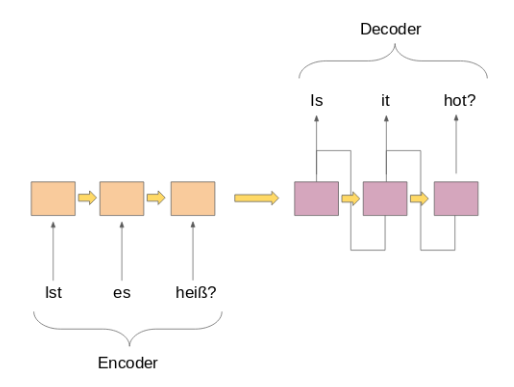

In [ ]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 462 kB 8.5 MB/s 


In [ ]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
len(vocab)

4391

In [ ]:
from tensorflow.keras.utils import to_categorical
decoder_final_output = to_categorical(decoder_final_output, len(vocab))

In [ ]:
decoder_final_output

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [ ]:
encoder_input = Input(shape=(20,))
decoder_input = Input(shape=(20,))

In [ ]:
vocab_size = len(vocab)

x = Embedding( vocab_size+1, output_dim = 100, input_length= 20, trainable = True)

encoder = x(encoder_input)
encoder_lstm = LSTM(400, return_sequences=True, return_state=True)
encoder_op, h, c = encoder_lstm(encoder)
encoder_states = [h,c]

dec_embed = x(decoder_input)
dec_lstm = LSTM(400, return_sequences=True, return_state=True)
dec_op, _, _ = dec_lstm(dec_embed, initial_state=encoder_states)
dense = Dense(vocab_size, activation='softmax')
dense_op = dense(dec_op)

model = Model([encoder_input, decoder_input], dense_op)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate = 0.0001))
model.fit( [encoder_inp, decoder_inp], decoder_final_output, batch_size = 32, validation_split = 0.2, epochs = 180)

Epoch 1/180
775/775 [==============================] - 32s 33ms/step - loss: 3.2728 - accuracy: 0.5399 - val_loss: 2.5929 - val_accuracy: 0.5875
Epoch 2/180
775/775 [==============================] - 23s 30ms/step - loss: 2.6271 - accuracy: 0.5769 - val_loss: 2.5215 - val_accuracy: 0.5956
Epoch 3/180
775/775 [==============================] - 23s 30ms/step - loss: 2.5842 - accuracy: 0.5804 - val_loss: 2.4945 - val_accuracy: 0.5994
Epoch 4/180
775/775 [==============================] - 23s 30ms/step - loss: 2.5469 - accuracy: 0.5859 - val_loss: 2.4575 - val_accuracy: 0.6033
Epoch 5/180
775/775 [==============================] - 23s 30ms/step - loss: 2.5032 - accuracy: 0.5887 - val_loss: 2.4262 - val_accuracy: 0.6047
Epoch 6/180
775/775 [==============================] - 23s 30ms/step - loss: 2.4654 - accuracy: 0.5918 - val_loss: 2.3927 - val_accuracy: 0.6087
Epoch 7/180
775/775 [==============================] - 23s 30ms/step - loss: 2.4256 - accuracy: 0.5970 - val_loss: 2.3602 - val_ac

In [ ]:
enc_model = Model([encoder_input], encoder_states)

decoder_state_input_h = Input(shape=(400,))
decoder_state_input_c = Input(shape=(400,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = dec_lstm(dec_embed , initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
dec_model = Model([decoder_input]+ decoder_states_inputs,[decoder_outputs]+ decoder_states)


In [ ]:
enc_model.save_weights("model_enc_cornell.h5")
print("Saved model to disk")
dec_model.save_weights("model_dec_cornell.h5")
print("Saved model to disk")

Saved model to disk
Saved model to disk


In [ ]:
from tensorflow import keras

In [ ]:
enc_model.load_weights('/content/model_enc_cornell.h5')
dec_model.load_weights('/content/model_dec_cornell.h5')

## Inference Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [ ]:
import numpy as np

In [ ]:
from keras.preprocessing.sequence import pad_sequences
print("##########################################")
print("#       start chatting ver. 1.0          #")
print("##########################################")


prepro1 = ""
while prepro1 != 'q':
    prepro1  = input("you : ")
    ## prepro1 = "Hello"

    prepro1 = prepro1.lower()#change
    ## prepro1 = "hello"

    prepro = [prepro1]
    ## prepro1 = ["hello"]

    txt = []
    for x in prepro:
        # x = "hello"
        lst = []
        for y in x.split():
            ## y = "hello"
            try:
                lst.append(vocab[y])
                ## vocab['hello'] = 454
            except:
                lst.append(vocab['<OUT>'])
        txt.append(lst)

    ## txt = [[454]]
    txt = pad_sequences(txt, 20, padding='post')##change

    ## txt = [[454,0,0,0,.........13]]

    stat = enc_model.predict( txt )

    empty_target_seq = np.zeros( ( 1 , 1) )
     ##   empty_target_seq = [0]


    empty_target_seq[0, 0] = vocab['<SOS>']
    ##    empty_target_seq = [255]

    stop_condition = False
    decoded_translation = ''

    while not stop_condition :

        dec_outputs , h, c= dec_model.predict([ empty_target_seq] + stat )
        decoder_concat_input = dense(dec_outputs)
        ## decoder_concat_input = [0.1, 0.2, .4, .0, ...............]

        sampled_word_index = np.argmax( decoder_concat_input[0, -1, :] )
        ## sampled_word_index = [2]

        sampled_word = inv_vocab[sampled_word_index] + ' '

        ## inv_vocab[2] = 'hi'
        ## sampled_word = 'hi '

        if sampled_word != '<EOS> ':
            decoded_translation += sampled_word

        if sampled_word == '<EOS> ' or len(decoded_translation.split()) > 20:##change
            stop_condition = True 

        empty_target_seq = np.zeros( ( 1 , 1 ) )  
        empty_target_seq[ 0 , 0 ] = sampled_word_index
        ## <SOS> - > hi
        ## hi --> <EOS>
        stat = [h, c]  

    print("chatbot attention : ", decoded_translation )
    print("==============================================")

##########################################
#       start chatting ver. 1.0          #
##########################################
chatbot attention :  hi 
chatbot attention :  no 


KeyboardInterrupt: ignored